In [1]:
import pandas as pd
import numpy as np

# Scenario 1: 2-headed coin

### Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1.

In [2]:
from montecarlo.montecarlo import Die

In [3]:
arr1 = np.array(['H', 'T'])
fair_die = Die(arr1)
unfair_die = Die(arr1)

In [4]:
unfair_die.change_weight('H', 5)

### Play a game of 1000 flips of three coins with all fair dice.

In [5]:
from montecarlo.montecarlo import Game

In [6]:
fair_list = [fair_die, fair_die, fair_die]
fair_game = Game(fair_list)

In [7]:
fair_game.play(1000)

### Play a game of 1000 flips with two unfair dice and one fair die.

In [8]:
unfair_list = [unfair_die, unfair_die, fair_die]
unfair_game = Game(unfair_list)

In [9]:
unfair_game.play(1000)

### For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts.

We start by analyzing the number of jackpots from the fair game.

In [10]:
from montecarlo.montecarlo import Analyzer

In [11]:
fair_results = fair_game.show_results('wide')

In [12]:
fair_analysis = Analyzer(fair_results)

In [13]:
fair_jackpots = fair_analysis.comp_jackpot()
print(fair_jackpots)

256


Above is the number of jackpots in the fair game.

Now we move to analyzing the number of jackpots in the unfair game. We expect this number to be higher since we increased the weight of 'H.'

In [14]:
unfair_results = unfair_game.show_results('wide')

In [15]:
unfair_analysis = Analyzer(unfair_results)

In [16]:
unfair_jackpots = unfair_analysis.comp_jackpot()
print(unfair_jackpots)

366


The number of jackpots for the unfair game is shown above.

### Compute relative frequency as the number of jackpots over the total number of rolls.

In [17]:
fair_jackpot_freq = fair_jackpots / 1000
unfair_jackpot_freq = unfair_jackpots / 1000

### Show results, comparing the two relative frequencies, in a simple bar chart.

In [18]:
import matplotlib.pyplot as plt

In [19]:
xaxis = ['Fair Game', 'Unfair Game']
yaxis = [fair_jackpot_freq, unfair_jackpot_freq]
title = 'Frequency of Jackpots within a Game'

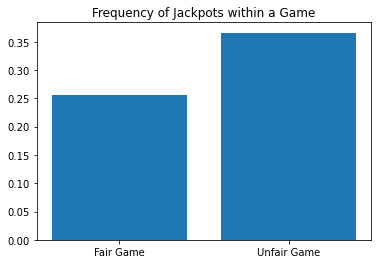

In [20]:
plt.bar(xaxis, yaxis);
plt.title(title)
plt.show()

A barplot comparing the jackpot frequencies is displayed above.

# Scenario 2: 6-sided die

### Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). The other unfair die (Type 2) will  weight 1 five times more than the others.

In [21]:
arr = np.array([1, 2, 3, 4, 5, 6])

fair_die = Die(arr)

unfair_die1 = Die(arr)
unfair_die1.change_weight(6, 5)

unfair_die2 = Die(arr)
unfair_die2.change_weight(1, 5)

### Play a game of 10000 rolls with 5 fair dice.

In [22]:
fair_list = [fair_die, fair_die, fair_die, fair_die, fair_die]
fair_game = Game(fair_list)

In [23]:
fair_game.play(10000)

### Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.

In [24]:
unfair_list = [unfair_die1, unfair_die1, unfair_die2, fair_die, fair_die]
unfair_game = Game(unfair_list)

In [25]:
unfair_game.play(10000)

### For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

First we analyze the fair 6-sided game.

In [26]:
fair_results = fair_game.show_results('narrow')

In [27]:
fair_analysis = Analyzer(fair_results)

In [28]:
fair_jackpots = fair_analysis.comp_jackpot()
print(fair_jackpots)

8


In [29]:
fair_analysis.jackpot_df

,0,1,2,3,4
roll_number,,,,,
9,1.0,1.0,1.0,1.0,1.0
49,2.0,2.0,2.0,2.0,2.0
778,2.0,2.0,2.0,2.0,2.0
892,1.0,1.0,1.0,1.0,1.0
2896,2.0,2.0,2.0,2.0,2.0
3866,4.0,4.0,4.0,4.0,4.0
6086,3.0,3.0,3.0,3.0,3.0
9551,5.0,5.0,5.0,5.0,5.0


You can see the fair game's jackpots above.

Now we will move onto analyzing the number of jackpots in the unfair game.

In [30]:
unfair_results = unfair_game.show_results('narrow')

In [31]:
unfair_analysis = Analyzer(unfair_results)

In [32]:
unfair_jackpots = unfair_analysis.comp_jackpot()
print(unfair_jackpots)

6


In [62]:
unfair_analysis.jackpot_df

,0,1,2,3,4
roll_number,,,,,
2913,2.0,2.0,2.0,2.0,2.0
3131,6.0,6.0,6.0,6.0,6.0
5535,6.0,6.0,6.0,6.0,6.0
7566,6.0,6.0,6.0,6.0,6.0
7571,6.0,6.0,6.0,6.0,6.0
8784,6.0,6.0,6.0,6.0,6.0


We see the unfair game jackpots above!

Now we are going to plot these two frequencies against each other in a simple bar chart.

In [33]:
fair_jackpot_freq = fair_jackpots / 10000
unfair_jackpot_freq = unfair_jackpots / 10000

In [34]:
xaxis = ['Fair Game', 'Unfair Game']
yaxis = [fair_jackpot_freq, unfair_jackpot_freq]
title = 'Frequency of Jackpots within a Game'

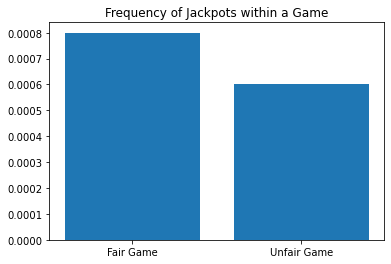

In [35]:
plt.bar(xaxis, yaxis);
plt.title(title)
plt.show()

You can visualize the frequencies of jackpots for each game above.

### Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

We will start by looking at most frequent combinations in the fair game.

In [36]:
fair_analysis.comp_combo()

In [37]:
fair_df = fair_analysis.combo_df
n_top10_fair_combos = pd.DataFrame(fair_df['n'].nlargest(n=10))

In [38]:
top10_fair_combos = n_top10_fair_combos.index.tolist()

In [39]:
top10_fair_combos # a list of tuples

[(1, 2, 3, 4, 5),
 (1, 2, 3, 4, 6),
 (2, 3, 4, 5, 6),
 (1, 2, 3, 5, 6),
 (1, 2, 4, 5, 6),
 (1, 3, 4, 5, 6),
 (1, 1, 2, 4, 5),
 (1, 2, 5, 5, 6),
 (2, 4, 5, 5, 6),
 (1, 1, 2, 3, 4)]

These are the 10 most frequent combinations in the fair game.

In [40]:
freq_lst = []
for val in n_top10_fair_combos['n']:
    freq_lst.append(val)
 # a list of the frequencies

In [41]:
dec_freq = []
for val in freq_lst:
    dec_freq.append(val / 10000)

In [42]:
title = 'Fair Game: Top 10 Most Frequent Combinations'

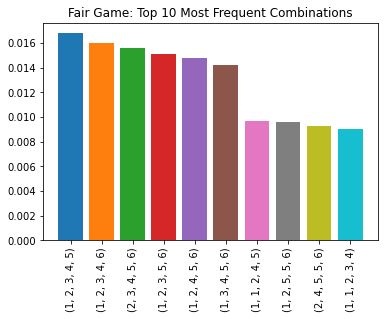

In [43]:
for i in zip(range(len(top10_fair_combos))):
    plt.bar(i, dec_freq[i[0]]);
plt.xticks((0, 1, 2, 3, 4, 5, 6, 7, 8, 9),\
           top10_fair_combos, rotation = 'vertical');
plt.title(title);
plt.show()

In the graph above, you can see how frequently each of the top 10 most frequent combinations appears in the fair game. 

Now, we will move onto evaluating the top 10 most frequent combinations in the unfair game.

In [44]:
unfair_analysis.comp_combo()

In [45]:
unfair_df = unfair_analysis.combo_df
n_top10_unfair_combos = pd.DataFrame(unfair_df['n'].nlargest(n=10))

In [46]:
top10_unfair_combos = n_top10_unfair_combos.index.tolist()

In [47]:
top10_unfair_combos # a list of tuples

[(1, 2, 5, 6, 6),
 (1, 4, 5, 6, 6),
 (1, 2, 4, 6, 6),
 (1, 3, 5, 6, 6),
 (1, 2, 3, 6, 6),
 (1, 3, 4, 6, 6),
 (1, 3, 4, 5, 6),
 (1, 2, 3, 5, 6),
 (1, 1, 5, 6, 6),
 (1, 2, 3, 4, 6)]

In [48]:
freq_lst = []
for val in n_top10_unfair_combos['n']:
    freq_lst.append(val)
 # a list of the frequencies

In [49]:
dec_freq = []
for val in freq_lst:
    dec_freq.append(val / 10000)

In [50]:
title = 'Unfair Game: Top 10 Most Frequent Combinations'

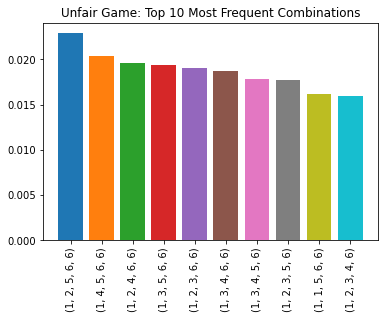

In [51]:
for i in zip(range(len(top10_fair_combos))):
    plt.bar(i, dec_freq[i[0]]);

plt.xticks((0, 1, 2, 3, 4, 5, 6, 7, 8, 9),\
           top10_unfair_combos, rotation = 'vertical');
plt.title(title);
plt.show()

In the graph above, you can see how frequently each of the top 10 most frequent combinations appears in the unfair game. 

# Scenario 3: Letters of the Roman Alphabet

### Create a "die" of letters from a to z with weights based on their frequency of usage. See Appendix for these weights.

In [52]:
arr = np.array(['a', 'b', 'c', 'd', 'e', 'f',\
                'g', 'h', 'i', 'j', 'k', 'l',\
                'm', 'n', 'o', 'p', 'q', 'r',\
               's', 't', 'u', 'v', 'w', 'x',\
                'y', 'z'])
die = Die(arr)

In [53]:
die.change_weight('a', 8.4966)
die.change_weight('b', 2.0720)
die.change_weight('c', 4.5388)
die.change_weight('d', 3.3844)
die.change_weight('e', 11.1607)
die.change_weight('f', 1.8121)
die.change_weight('g', 2.4705)
die.change_weight('h', 3.0034)
die.change_weight('i', 7.5448)
die.change_weight('j', 0.1965)
die.change_weight('k', 1.1016)
die.change_weight('l', 5.4893)
die.change_weight('m', 3.0129)
die.change_weight('n', 6.6544)
die.change_weight('o', 7.1635)
die.change_weight('p', 3.1671)
die.change_weight('q', 0.1962)
die.change_weight('r', 7.5809)
die.change_weight('s', 5.7351)
die.change_weight('t', 6.9509)
die.change_weight('u', 3.6308)
die.change_weight('v', 1.0074)
die.change_weight('w', 1.2899)
die.change_weight('x', 0.2902)
die.change_weight('y', 1.7779)
die.change_weight('z', 0.2722)

In [54]:
die.show_die() # here you can see that all weights have been changed

,weight
side,
a,8.4966
b,2.0720
c,4.5388
d,3.3844
e,11.1607
f,1.8121
g,2.4705
h,3.0034
i,7.5448


### Play a game involving 5 of these dice with 1000 rolls.

In [55]:
dice = [die, die, die, die, die]
game = Game(dice)

In [56]:
game.play(1000)

In [57]:
#with pd.option_context('display.max_rows', None,
#                       'display.max_columns', None,
#                       'display.precision', 3,
#                       ):
#    print(game.show_results())

The code block above can be uncommented to view the entire dataset. For the purpose of this scenario, we will only view the first 10 and last 10 combinations.

In [58]:
game.show_results().head(10)

die_number,0,1,2,3,4
roll_number,,,,,
0,e,a,a,n,n
1,r,c,e,n,s
2,e,a,m,i,e
3,t,o,l,g,a
4,r,k,v,a,e
5,r,c,t,h,a
6,b,a,p,f,e
7,l,v,t,b,a
8,t,a,r,l,r


In [59]:
game.show_results().tail(10)

die_number,0,1,2,3,4
roll_number,,,,,
990,l,t,r,r,n
991,i,s,e,u,s
992,m,c,r,a,o
993,p,y,o,l,a
994,s,l,s,e,i
995,r,k,s,h,o
996,c,a,t,g,f
997,e,m,s,o,p
998,o,k,u,p,n


After viewing the dataset, it appears that there are about 5 five-letter words made from the dice face combinations.

### Based on your eye count, what is the relative frequency of these words versus the rest?

It appears that words are not incredibly frequent in the dataframe. Based on an estimation of 5 words, the frequency of full words would be low.

In [60]:
word_freq = 5/1000

In [61]:
print(word_freq)

0.005


The frequency of word appearance is approximately 0.005.